# Assumption test

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
#-------------------
import scipy.stats as stats
import statistics

In [2]:
# read data and create DataFram
path = "D:/Last project Data Analayses/Music Analysis/data/processed/Dataframe"
dir_list = os.listdir(path)
variable_names = dir_list.copy()
for i in range(len(variable_names)):
    variable_names[i] = variable_names[i].replace(".csv","")

file_names = dir_list

for var_name, file_name in zip(variable_names, file_names):
    print(f"name {var_name}    and file {var_name}")
    globals()[var_name] = pd.read_csv(f'D:/Last project Data Analayses/Music Analysis/data/processed/Dataframe/{file_name}').drop("Unnamed: 0", axis=1)


name album    and file album
name artist    and file artist
name customer    and file customer
name employee    and file employee
name genre    and file genre
name invoice    and file invoice
name invoiceline    and file invoiceline
name mediatype    and file mediatype
name playlist    and file playlist
name playlisttrack    and file playlisttrack
name track    and file track


Find popular genres with pandas 3. Check the difference in the average price of these two distributions

In [4]:
gener_price_quantity = (pd.merge(pd.merge(invoiceline, track[['TrackId', 'GenreId']],
                                left_on='TrackId', right_on='TrackId')
                                .drop(columns='InvoiceLineId'),
                                 genre, left_on='GenreId', right_on='GenreId')
                                .drop(columns=['InvoiceId', 'TrackId']))
gener_price_quantity['total_price'] = gener_price_quantity['Quantity'] * gener_price_quantity['UnitPrice']
gener_total_price = (gener_price_quantity.copy()[['GenreId','Name','Quantity','total_price']]
                     .groupby(['GenreId','Name']).sum().reset_index()
                     .sort_values(by=['total_price'],ascending=False)).reset_index().drop(columns='index')
gener_total_price['avg_price']=gener_total_price['total_price']/gener_total_price['Quantity']


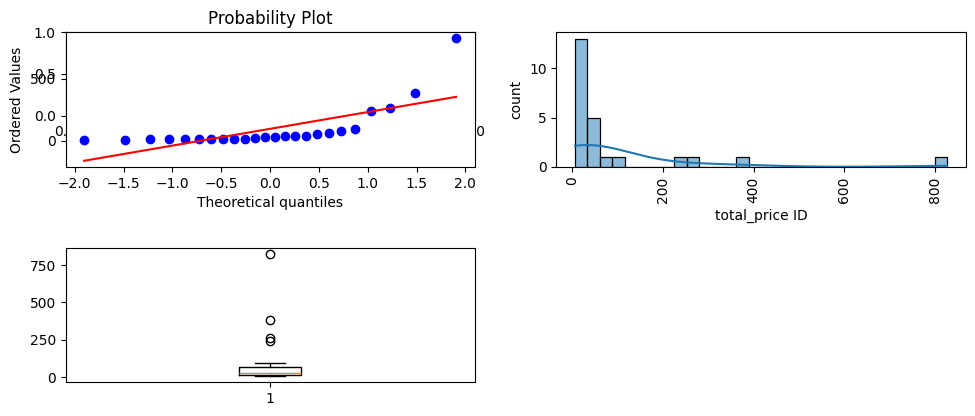

In [5]:
plt.figure(figsize=(10, 5))
plt.subplots_adjust(left=0.1,
                    bottom=0.2, 
                    right=1, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.6)
plt.subplot(3,2,1)
plt.subplot(2,2,1)
stats.probplot(gener_total_price['total_price'], dist='norm', plot=plt)

plt.subplot(2,2,2)
sns.histplot(gener_total_price['total_price'],bins=30, kde=True)
plt.xlabel('total_price ID')
plt.xticks(rotation=90)
plt.ylabel('count')
plt.subplot(2,2,3)
plt.boxplot(gener_total_price['total_price'])
plt.show()

In [6]:
a1 = float(gener_total_price.iloc[0]['total_price'])
a2 = float(gener_total_price.iloc[1]['total_price'])
a3 = float(gener_total_price.iloc[2]['total_price'])
print(a1,a2,a3)
t_stat, p_value = stats.kruskal(a1,a2,a3)

print(f'kruskal test: t_stat = {t_stat} ,p_value = {p_value}')
alpha = 0.05
if p_value < alpha:
    print("avrage sales is diffrant")
else:
    print("avrage seles is not diffrant")


826.65 382.14 261.36
kruskal test: t_stat = 2.0 ,p_value = 0.36787944117144245
avrage seles is not diffrant


Check the existence of independence between the length of the song and its price

In [13]:
track_time_price = track[['TrackId', 'Milliseconds', 'UnitPrice']]
track_time_price
related_price_time = track_time_price['Milliseconds'].corr(track_time_price['UnitPrice'])


correlation, p_value = stats.spearmanr(track_time_price['Milliseconds'],
                                        track_time_price['UnitPrice'])
print(p_value)
if p_value < 0.05:
    print("independent")
else:
    print("NOT independent")


4.576036687486155e-142
independent


Check the independence of song genre and media type

In [12]:
media_type_gener = track[['MediaTypeId', 'GenreId', 'UnitPrice']]
related_media_type_gener = media_type_gener['GenreId'].corr(media_type_gener['MediaTypeId'])
print(f"The relationship between song length and price : {correlation}")
if correlation < 0.05:
    print("independent")
else:
    print("NOT independent")
# ------------------
chi2, p_value_chai, dof, expected = stats.chi2_contingency(media_type_gener)
if p_value_chai < 0.05:
    print("independent")
else:
    print("NOT independent")

The relationship between song length and price : 0.4099206080846446
NOT independent
NOT independent


Check the independence of the country and the number of purchases

In [74]:
country_quantity_price = (pd.merge(pd.merge(invoiceline, invoice[['InvoiceId', 'CustomerId']], 
                            right_on='InvoiceId', left_on='InvoiceId'),
                            customer[['CustomerId', 'Country']],
                             right_on='CustomerId', left_on='CustomerId')[['Country','UnitPrice', 'Quantity']])
country_quantity_price['total_price'] = country_quantity_price['Quantity'] * country_quantity_price['UnitPrice']
country_total_quantity_price = (country_quantity_price[['Country', 'Quantity','total_price']]
                                .groupby('Country').sum()).reset_index().sort_values(by='total_price',ascending=False)

# conuntry and total price
f_statistic, p_value = (stats.f_oneway(country_total_quantity_price.index,
                                        country_total_quantity_price['total_price']))

if p_value < 0.05:
    print("independent -  The purchase amount depends on the country")
else:
    print("NOT independent contry and total price")

# contry and quantity
f_statistic, p_value = (stats.f_oneway(country_total_quantity_price.index,
                                        country_total_quantity_price['Quantity']))
if p_value < 0.05:
    print("independent -  The purchase quantity on the country")
else:
    print("NOT independent contry and quantity")

independent -  The purchase amount depends on the country
independent -  The purchase quantity on the country


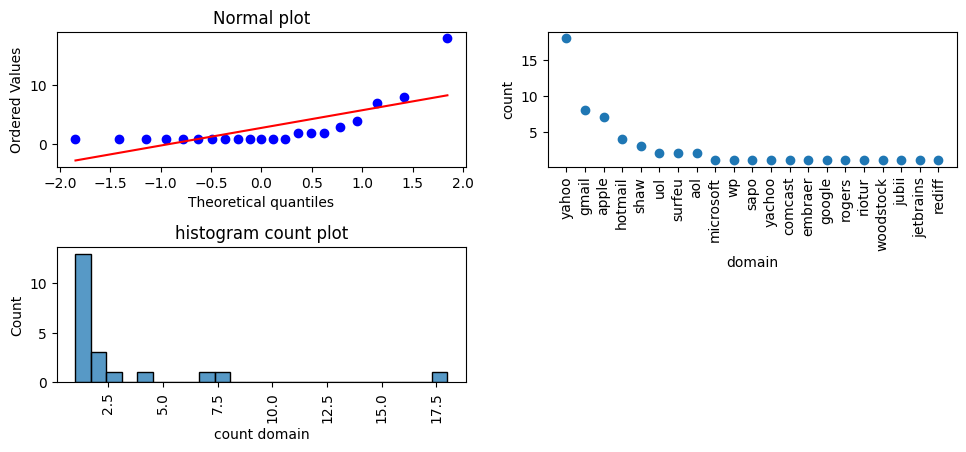

In [121]:
domain = pd.DataFrame((customer['Email'].str.split(pat="@",expand=True)
                        .rename(columns={0:'name', 1:'domain'})['domain']
                        .str.split(pat=".",expand=True)
                        .rename(columns={0:'domain', 1:'com'}))['domain'].value_counts()).reset_index()

plt.figure(figsize=(10, 5))
plt.subplots_adjust(left=0.1,
                    bottom=0.2, 
                    right=1, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.6)

plt.subplot(2,2,1)
stats.probplot(domain['count'], dist='norm', plot=plt)
plt.title("Normal plot")


plt.subplot(2,2,2)
plt.scatter(domain['domain'],domain['count'])
plt.xticks(rotation=90)
plt.xlabel('domain')
plt.ylabel('count')

plt.subplot(2,2,3)
sns.histplot(domain['count'])
plt.title("histogram count plot")
plt.xticks(rotation=90)
plt.xlabel('count domain')

plt.show()